
# Ensemble Learning y Bagging

**Ensemble Learning** es una técnica utilizada para mejorar el rendimiento de un modelo al combinar las predicciones de múltiples modelos. Se puede utilizar para reducir el sesgo (en el caso de **boosting**) o la varianza (en el caso de **bagging**).

## Bagging (Bootstrap Aggregating)
**Bagging** es un tipo de **ensemble learning** que utiliza modelos entrenados sobre **subconjuntos de datos con muestreo con reemplazo** (también conocido como **bootstrap**). Bagging tiene como objetivo reducir la **varianza** de un modelo y mejorar la precisión y estabilidad al combinar varias predicciones.

### Pasos de Bagging:
1. Crear **subconjuntos de datos** mediante muestreo con reemplazo.
2. Entrenar **múltiples modelos** en estos subconjuntos.
3. **Combinar las predicciones**: Para clasificación, se usa votación mayoritaria; para regresión, se usa el promedio de las predicciones.

### Ejemplo de modelo de Bagging: Random Forest
El **Random Forest** utiliza **árboles de decisión** como base learners y aplica **bagging** para crear múltiples árboles entrenados en diferentes subconjuntos del conjunto de datos.



Accuracy: 100.00%


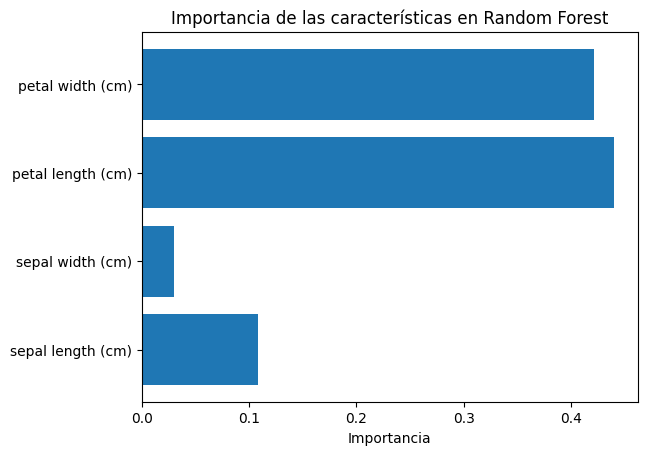

In [1]:

# Importar las librerías necesarias
import numpy as np
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Cargar el dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de Random Forest (Bagging)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Graficar la importancia de las características
feature_importances = model.feature_importances_
plt.barh(iris.feature_names, feature_importances)
plt.title("Importancia de las características en Random Forest")
plt.xlabel("Importancia")
plt.show()


Un accuracy del 100% en tu modelo puede ser una señal de que el modelo está sobreajustado (overfitting), lo que significa que el modelo está memorizando los datos de entrenamiento en lugar de generalizar bien a datos nuevos. Para verificar si existe sobreajuste y cómo abordarlo, puedes seguir estos pasos:
1. Validación Cruzada:

Utilizar validación cruzada te permitirá evaluar el modelo en varios subconjuntos del dataset, lo que ayuda a detectar si el modelo solo está funcionando bien en los datos de entrenamiento pero no en datos no vistos. Esto te proporciona una medida más robusta del rendimiento.
Código para Validación Cruzada:

In [2]:
from sklearn.model_selection import cross_val_score

# Realizar validación cruzada con 5 pliegues
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Mostrar los resultados de la validación cruzada
print(f"Precisión en cada fold: {cv_scores}")
print(f"Precisión media en la validación cruzada: {cv_scores.mean():.2f}")


Precisión en cada fold: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Precisión media en la validación cruzada: 0.97


Explicación:

    La validación cruzada divide el conjunto de datos en 5 partes (o más, dependiendo del parámetro cv), entrena el modelo en 4 de ellas y evalúa en la restante.
    Esto permite obtener un rendimiento más confiable y detectar el sobreajuste si el modelo tiene una precisión significativamente mejor en el conjunto de entrenamiento que en la validación cruzada.

2. Comparar el rendimiento en los conjuntos de entrenamiento y prueba:

Si el modelo tiene un rendimiento significativamente mejor en el conjunto de entrenamiento que en el conjunto de prueba, es una señal de sobreajuste. Para verificar esto:
Código para verificar el rendimiento:

In [3]:
# Calcular accuracy en el conjunto de entrenamiento
train_accuracy = model.score(X_train, y_train)
print(f"Accuracy en el conjunto de entrenamiento: {train_accuracy * 100:.2f}%")

# Calcular accuracy en el conjunto de prueba
test_accuracy = model.score(X_test, y_test)
print(f"Accuracy en el conjunto de prueba: {test_accuracy * 100:.2f}%")


Accuracy en el conjunto de entrenamiento: 100.00%
Accuracy en el conjunto de prueba: 100.00%


3. Regularización:

La regularización es una técnica que ayuda a reducir el sobreajuste al penalizar la complejidad del modelo. En el caso de los árboles de decisión y Random Forest, se pueden ajustar los hiperparámetros que controlan la profundidad del árbol y otros aspectos del modelo.
Hiperparámetros clave para controlar el sobreajuste:

    max_depth: Limita la profundidad máxima de los árboles.
    min_samples_split: Establece el número mínimo de muestras necesarias para dividir un nodo.
    min_samples_leaf: Establece el número mínimo de muestras necesarias para ser una hoja en el árbol.
    max_features: Limita el número de características consideradas para dividir cada nodo.

Puedes ajustar estos hiperparámetros para evitar que el modelo se vuelva demasiado complejo y sobreajustado.
Ejemplo de ajuste de hiperparámetros:

In [4]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=4, min_samples_leaf=2, random_state=42)
model.fit(X_train, y_train)

# Verificar el accuracy después de ajustar el modelo
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)
print(f"Accuracy en entrenamiento: {train_accuracy * 100:.2f}%")
print(f"Accuracy en prueba: {test_accuracy * 100:.2f}%")


Accuracy en entrenamiento: 97.50%
Accuracy en prueba: 100.00%


4. Visualización de la importancia de las características:

El Random Forest también te permite verificar cuáles son las características más importantes para la clasificación. Si ciertas características están influyendo demasiado, puedes intentar eliminar algunas o aplicar técnicas de selección de características para reducir la complejidad del modelo.

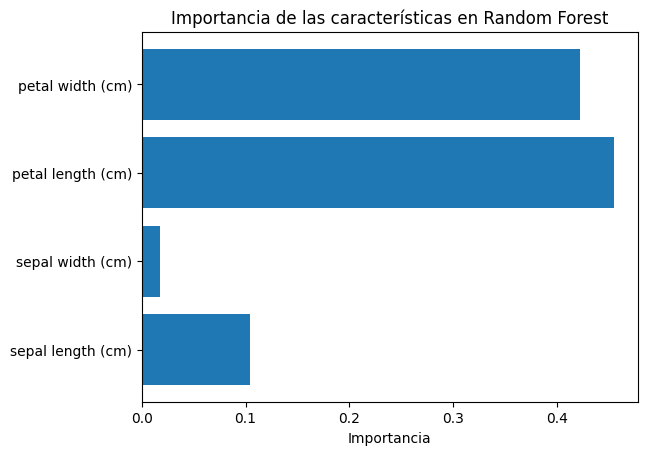

In [5]:
# Visualizar la importancia de las características
feature_importances = model.feature_importances_
plt.barh(iris.feature_names, feature_importances)
plt.title("Importancia de las características en Random Forest")
plt.xlabel("Importancia")
plt.show()


5. Prueba con otro modelo:

Si sigues obteniendo un accuracy del 100%, puedes probar otros modelos más simples (como Regresión Logística o SVM con regularización) y compararlos para asegurarte de que el modelo no esté sobreajustado.

Resumen de pasos para verificar y prevenir el sobreajuste:

    Realizar validación cruzada para obtener una evaluación más confiable.
    Comparar el rendimiento en el entrenamiento y la prueba para identificar posibles diferencias.
    Ajustar los hiperparámetros de regularización para controlar la complejidad del modelo.
    Visualizar la importancia de las características para verificar si alguna está dominando el modelo innecesariamente.
    Probar con otros modelos para comparar el rendimiento.